# Linear Regression

* Linear regression is a statistical method that models the relationship between a dependent variable 𝑌 (continuous) and one or more independent variables 𝑋1, 𝑋2, … ,𝑋𝑝 by assuming that 𝑌 is a linear combination of the inputs plus an error term.
* Linear regression is typically a supervised learning that requires labeled data.
* Linear Regression assumes that Y is a linear combination of the inputs plus an error term.

* One of the assumption of linear regression is variables X1, X2...Xn are independent, if two of variables are highly related, it would cause the regression parameter beta and the whole linear model to be unstable. Correlation analysis between variables is necessary to ensure variables are independent from each other. If there're variables share a correlation coefficients larger than 0.8, we can consider directly removing them or transfering variables using PCA.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.head().transpose()

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13 00:00:00,2014-12-09 00:00:00,2015-02-25 00:00:00,2014-12-09 00:00:00,2015-02-18 00:00:00
price,221900.0,538000.0,180000.0,604000.0,510000.0
bedrooms,3,3,2,4,3
bathrooms,1.0,2.25,1.0,3.0,2.0
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1.0,2.0,1.0,1.0,1.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [25]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'yr_built']]
y = df['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [27]:
# Convert pd series to numpy since Linear Regression function only accept numpy array
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.ravel(y_train)       # since y is one-dimensional, therefore using ravel
y_test = np.ravel(y_test)

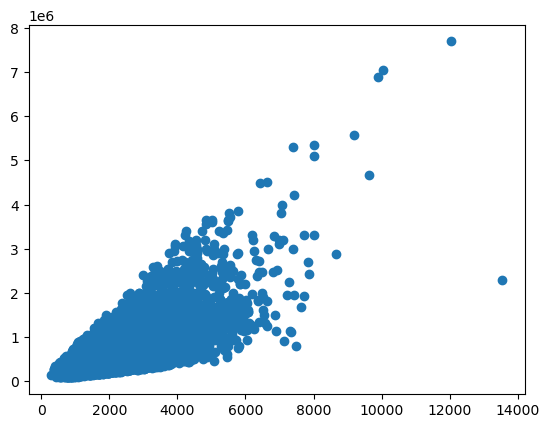

In [28]:
plt.scatter(X['sqft_living'], y)

<Axes: xlabel='sqft_living', ylabel='Count'>

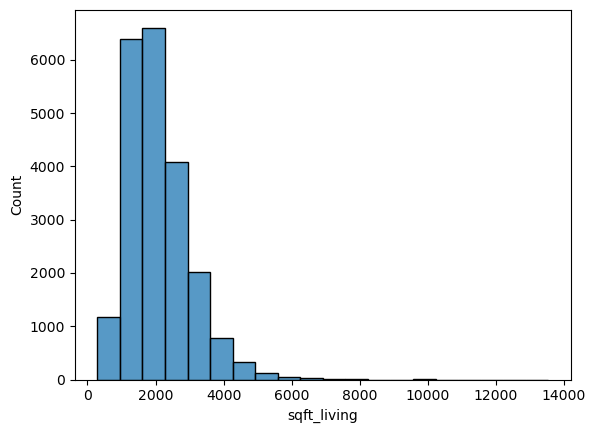

In [29]:
sns.histplot(data=df, x='sqft_living', bins=20)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Then we can get the coefficients for each features in X
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-50150.924575
1,bathrooms,54654.614540
2,sqft_living,262.061275
3,floors,67183.339536
4,view,89013.728841
5,condition,21221.172137
6,yr_built,-2710.625198


In [33]:
model.predict([[3, 2, 2500, 2, 0, 5, 2015]])

array([589639.2966351])

In [34]:
# MSE 
pred = model.predict(X_train)
MSE = ((pred-y_train)*(pred-y_train)).sum() / len(y_train)
print(MSE)

54647557358.2218


In [35]:
metrics.mean_squared_error(y_train, pred)

54647557358.2218

In [36]:
# MAE
MAE = (abs(pred - y_train) / y_train).sum() / len(y_train)
print(MAE)

0.3225185296061509


In [37]:
pred_test = model.predict(X_test)
MSE_test = metrics.mean_squared_error(y_test, pred_test)
print(MSE_test)

59689601123.61112


In [38]:
MAE_test = (abs(pred_test - y_test) / y_test).sum() / len(y_test)
print(MAE_test)

0.31753936591817283


In [20]:
import statsmodels.api as sm

In [39]:
X = sm.add_constant(X, prepend=False)

In [40]:
mod = sm.OLS(y, X)     #最小二乘法
result = mod.fit()

In [41]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     4311.
Date:                Wed, 27 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:02:13   Log-Likelihood:            -2.9816e+05
No. Observations:               21613   AIC:                         5.963e+05
Df Residuals:                   21605   BIC:                         5.964e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -5.779e+04   2187.681    -26.417      0.000   -6.21e+04   -5.35e+04
bathrooms    5.943e+04   3725.722     15.951      0.000    5.21e+04    6.67e+04
sqft_living   273.6958      2.929     93.442      0.000     267.955     279.437
floors       6.308e+04   3683.013     17.128      0.000    5.59e+04    7.03e+04
view          8.35e+04   2243.237     37.222      0.000    7.91e+04    8.79e+04
condition    1.683e+04   2696.447      6.240      0.000    1.15e+04    2.21e+04
yr_built    -2869.4141     71.519    -40.121      0.000   -3009.598   -2729.231
const        5.524e+06   1.41e+05     39.175      0.000    5.25e+06     5.8e+06
==============================================================================
Omnibus:                    14062.207   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           562990.544
Skew:                           2.574   Prob(JB):                         0.00
Kurtosis:                      27.468   Cond. No.                     2.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""